# Assignment 1

<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


## Q1: Simulate aliasing of sinusoidal signals

For this problem you will simulate the phenomena of aliasing.  This will give you pracitice in making synthetic time series, subsetting data, and plotting your results.

**1** To start, make a time vector that goes from 0 to 120 s, with 10000 entries in it.  Then make a synthetic time series that has two close in frequency sine waves:

$$ x = A_1 \cos (\omega t) + A_2 \cos ((\omega_1+\delta \omega ) t) $$

where $\omega$ is the "carrier" frequency, and $\delta \omega << \omega$ is the difference in frequencies between the two waves.  For simplicty, you could make $A_1=A_2=1. [V]$.  Feel free to choose an interesting $\omega$.

<hr>

In [1]:
# You will almost always need to import these:  Make sure to run this cell!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# YOUR CODE HERE
import math as math
t = np.linspace(0., 120.0, 10000)
w = math.pi / 10
dw = 0.4
x = []
y = []
z = []
for i in range(10000):
    x.append(math.cos(w*t[i]))
    y.append(math.cos((w+dw)*t[i]))
    z.append(x[i]+y[i])
# MY CODE ENDS
#raise NotImplementedError()

**2** Now plot the two component waves and the full value of $x$ as a time series.  Preferably on the same axis.  Make sure to label your axes and include a legend<hr>

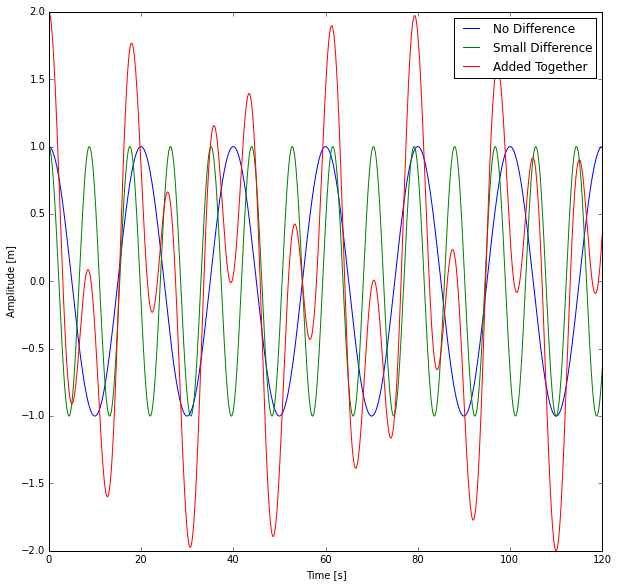

In [12]:
# YOUR CODE HERE
fig=plt.figure(figsize=(120,120))
ax=fig.add_subplot(15,15,1)

ax.plot(t,x,label='No Difference')
ax.plot(t,y,label='Small Difference')
ax.plot(t,z,label='Added Together')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [m]')
ax.legend(loc=0)
fig.tight_layout()
#print fig
# MY CODE ENDS
#raise NotImplementedError()

**3** Try a few different values of $\delta\omega$, and compare.<hr>

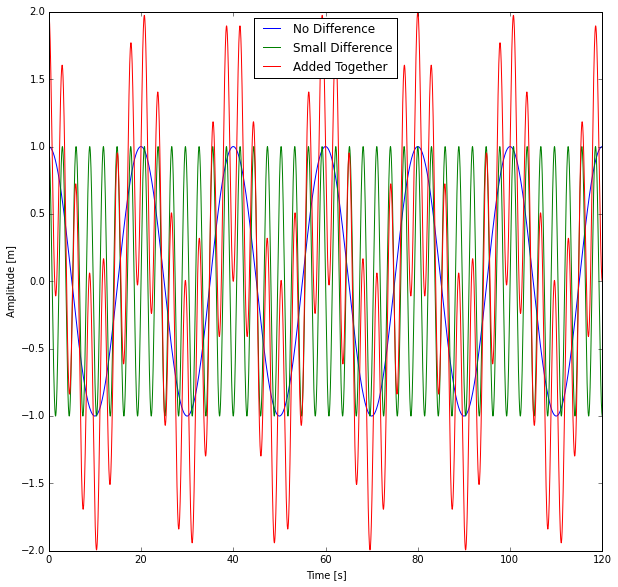

In [15]:
dw = math.pi / 120
p=[]
s=[]
for i in range(10000):
    p.append(math.cos((w+dw)*t[i]))
    s.append(x[i]+p[i])
fig1=plt.figure(figsize=(120,120))
ax1=fig1.add_subplot(15,15,1)

ax1.plot(t,x,label='No Difference')
ax1.plot(t,p,label='Small Difference')
ax1.plot(t,s,label='Added Together')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [m]')
ax1.legend(loc=0)
fig1.tight_layout()
#print fig
#raise NotImplementedError()

**4** Now, just so this works, let me specify some numbers for you.  Make $\omega=\frac{2\pi}{3}$, and $\delta\omega=\omega/10.$.  Plot the original time series, and a subsampled time series that just consists of every 200th point.  In a "Markdown" box below the code (or as a comment) describe the difference in these two signals as quantifiably as you can.  <hr>

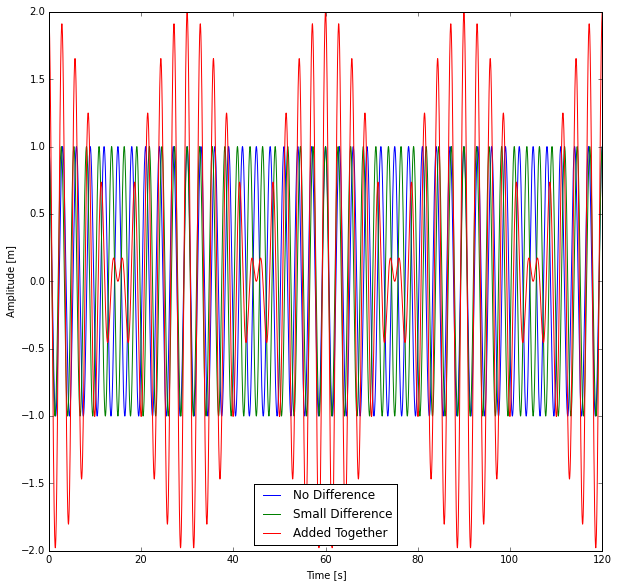

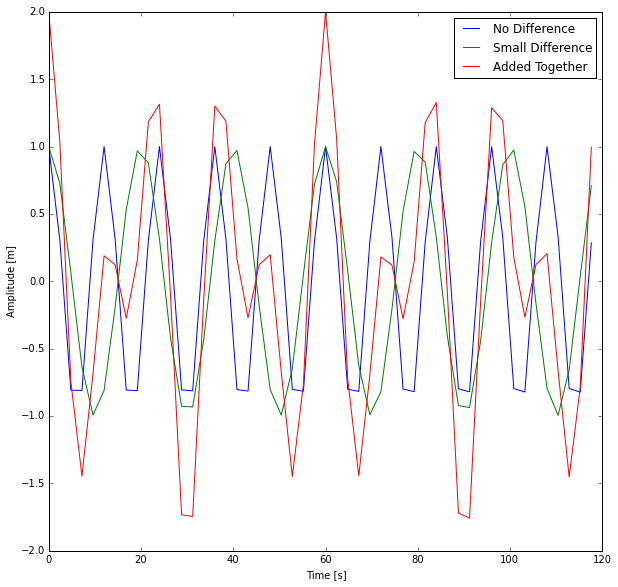

In [63]:
# YOUR CODE HERE
w = (2./3.)*math.pi
dw = w/10
q = []
e = []
r = []
for i in range(10000):
    q.append(math.cos(w*t[i]))
    e.append(math.cos((w+dw)*t[i]))
    r.append(q[i]+e[i])
fig2=plt.figure(figsize=(120,120))
ax2=fig2.add_subplot(15,15,1)
ax2.plot(t,q,label='No Difference')
ax2.plot(t,e,label='Small Difference')
ax2.plot(t,r,label='Added Together')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude [m]')
ax2.legend(loc=0)
fig2.tight_layout()
#print fig
fig3=plt.figure(figsize=(120,120))
ax3=fig3.add_subplot(15,15,1)
ax3.plot(t[0::200],q[0::200],label='No Difference')
ax3.plot(t[0::200],e[0::200],label='Small Difference')
ax3.plot(t[0::200],r[0::200],label='Added Together')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Amplitude [m]')
ax3.legend(loc=0)
fig3.tight_layout()
#raise NotImplementedError()

## Q2: Demonstrate the central limit theorem for a very unfair coin flip.

Consider a coin that is twice as likely to come up heads as tails. To put a number on it, call tails $x=-1/2$ and heads $x=+1/2$.  

**1** What are the mean, $\mu_x$, and variance $\sigma_x^2$ of this process?

<hr>

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**2** Plot or represent the *probability distribution*  (or cumulative distrubution) of this process.
<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**3** Write a function using the `np.random.rand` function to simulate the coin flip.  It shoudl return $+1/2+$ twice as often as $-1/2$.  Demonstrate that your function works.
<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**4** Perform $N_{flip}$ and take the sample mean $\overline{x}$ of the values.  Do this 2000 times, and show that as $N_{flip}\to\infty$ the distribution of $\overline{x}$ approaches a Normal distribution by plotting the histograms of the means for each.  For $N_{flip}$ choose 2, 16, 64, 256. 

Comment on how the convergence of $\overline{x}$ for the unfair coin compares to the convergence of the sample mean of the dice roll from the notes.  
<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

<hr>
**5** Replot the histograms, removing the mean and normalizing by the standard deviation.  Also show the CDF for normal distribution with mean zero and standard deviation of 1.
<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Q3: Look at the Deep Cove weather data: 

There are two data sets, one with a sample every minute at 

`http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt`.

Download it locally, or use `genfromtxt` with the url as an argument.

The second is hourly data of the smae station and a lot more.

`http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/AllHourly.txt`


In [ ]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[6,2:]


**1** Compare the normalized histograms of the two time series.  Also calculate the means and the standard deviations.
<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**2** Comment on the shape of these histograms.  Are they Normal?  Speculate as to why they have this shape.
<hr>

YOUR ANSWER HERE

<hr>
**3** Redo the histogram and the statistics with just the temperature at 3 PM (both time series start at midnight local time).
<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**4** Redo the histogram and the statistics with just the temperature at 5 AM (both time series start at midnight local time).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()